In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Tetiana\Documents\ironhack\lab\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [3]:
df.shape

(9134, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace("employmentstatus", "employment_status")
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
df['effective_to_date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

In [9]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'])

In [10]:
df.dtypes


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [11]:
df.describe()

customer_lifetime_value              effective_to_date        income  \
count              9134.000000                           9134   9134.000000   
mean               8004.940475  2011-01-29 20:06:21.519597056  37657.380009   
min                1898.007675            2011-01-01 00:00:00      0.000000   
25%                3994.251794            2011-01-15 00:00:00      0.000000   
50%                5780.182197            2011-01-29 00:00:00  33889.500000   
75%                8962.167041            2011-02-13 00:00:00  62320.000000   
max               83325.381190            2011-02-28 00:00:00  99981.000000   
std                6870.967608                            NaN  30379.904734   

       monthly_premium_auto  months_since_last_claim  \
count           9134.000000              9134.000000   
mean              93.219291                15.097000   
min               61.000000                 0.000000   
25%               68.000000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000000   
max              298.000000                35.000000   
std               34.407967                10.073257   

       months_since_policy_inception  number_of_open_complaints  \
count                    9134.000000                9134.000000   
mean                       48.064594                   0.384388   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   
std                        27.905991                   0.910384   

       number_of_policies  total_claim_amount  
count         9134.000000         9134.000000  
mean             2.966170          434.088794  
min              1.000000            0.099007  
25%              1.000000          272.258244  
50%              2.000000          383.945434  
75%              4.000000          547.514839  
max              9.000000         2893.239678  
std              2.390182          290.500092

In [12]:
nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage'])
nulls[nulls['percentage'] > 0].sort_values('percentage', ascending = False)

Empty DataFrame
Columns: [percentage]
Index: []

In [13]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
numerical = df.select_dtypes("number")
numerical

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

In [15]:
correlations_matrix = numerical.corr()
correlations_matrix

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   
number_of_open_complaints                 -0.013122                 0.005354   
number_of_policies                        -0.011233                 0.009136   
total_claim_amount                         0.632017                 0.007563   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.001158   
number_of_policies                                 -0.013333   
total_claim_amount                                  0.003335   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   
number_of_open_complaints                       1.000000            0.001498   
number_of_policies                              0.001498            1.000000   
total_claim_amount                             -0.014241           -0.002354   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335  
number_of_open_complaints               -0.014241  
number_of_policies                      -0.002354  
total_claim_amount                       1.000000

In [16]:
correlations_matrix["total_claim_amount"].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

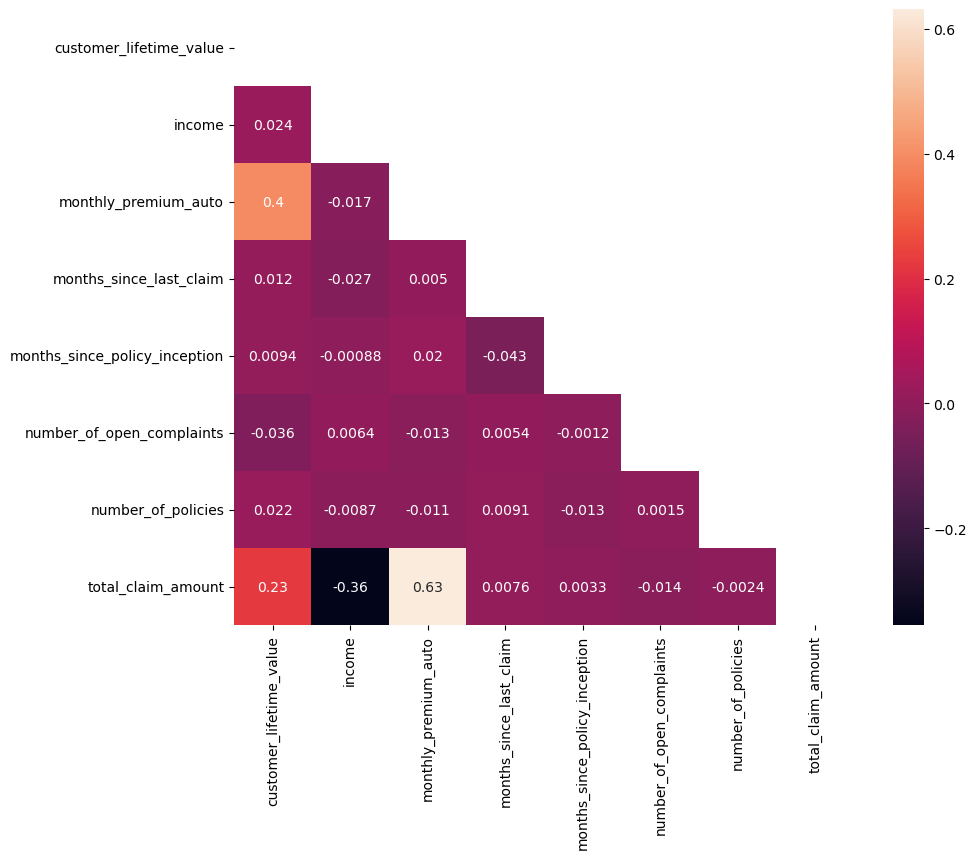

In [17]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

We can't see multicollinearity between columns 

customer_lifetime_value


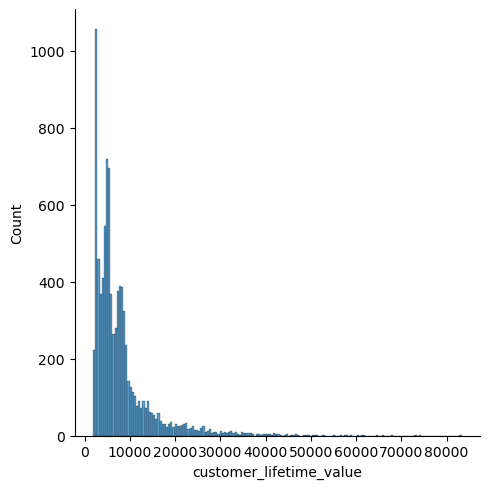

income


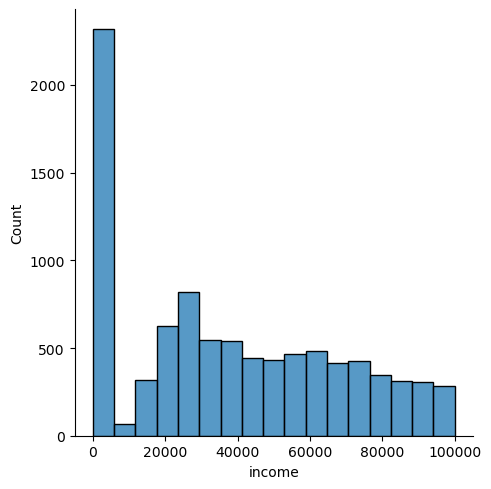

monthly_premium_auto


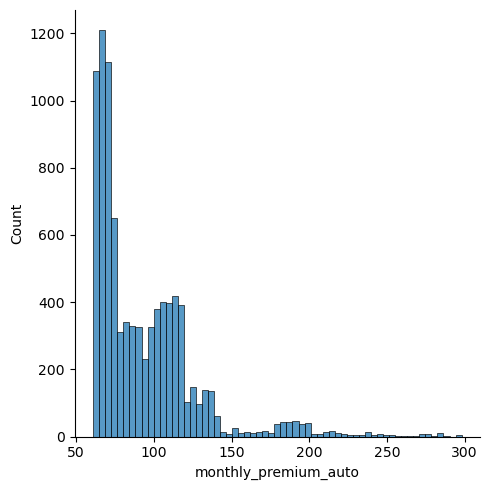

months_since_last_claim


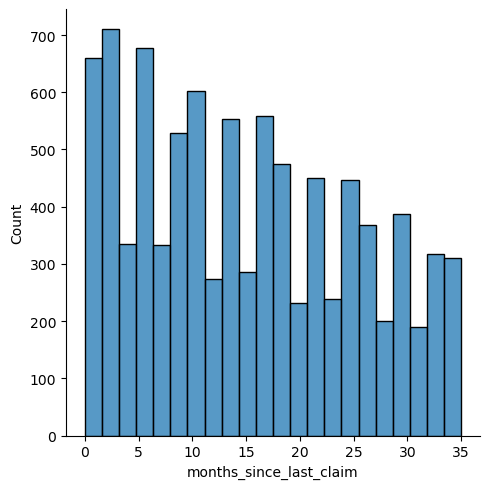

months_since_policy_inception


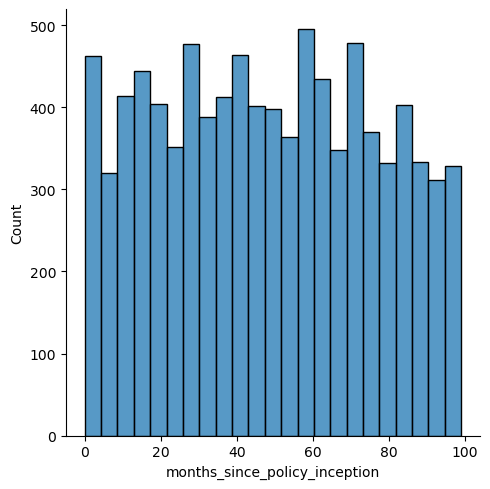

number_of_open_complaints


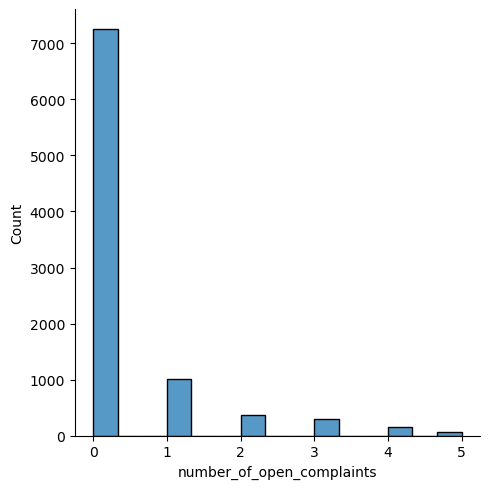

number_of_policies


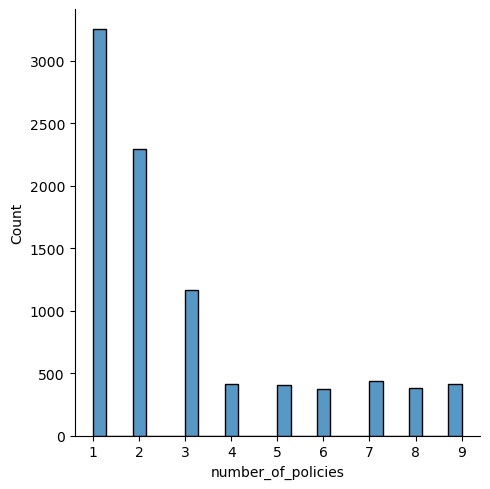

total_claim_amount


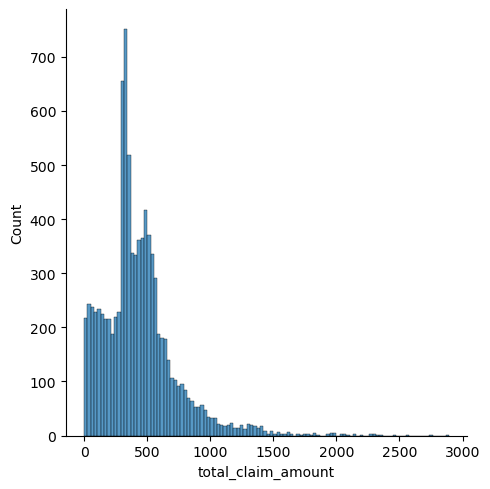

In [18]:
for col in numerical.columns:
    print(col)
    sns.displot(numerical[col])
    plt.show()


We can see that columns with continuous variables(total_claim_amount, monthly_premium_auto, income, customer_lifetiem_value) have mostly normal destribution with scew on the right(because all of this columns represent money). Income have a lot of '0' variables; we can try to get rid of them. Another columns distinct.

<function matplotlib.pyplot.show(close=None, block=None)>

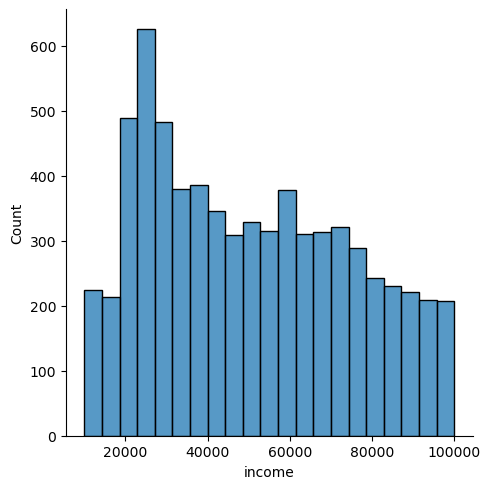

In [19]:
income = numerical[(numerical['income']>0)]
sns.displot(income['income'])
plt.show

customer_lifetime_value


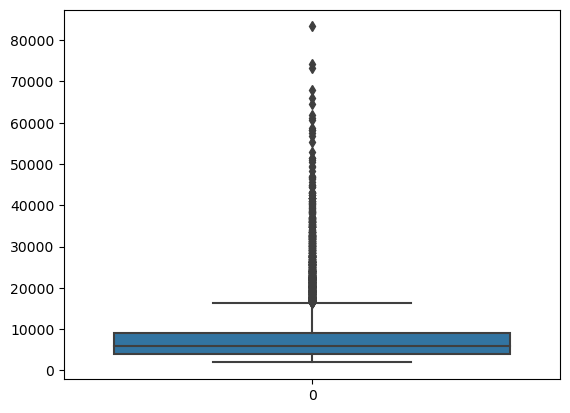

income


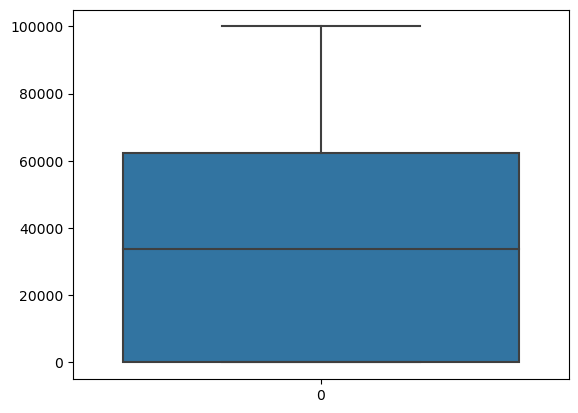

monthly_premium_auto


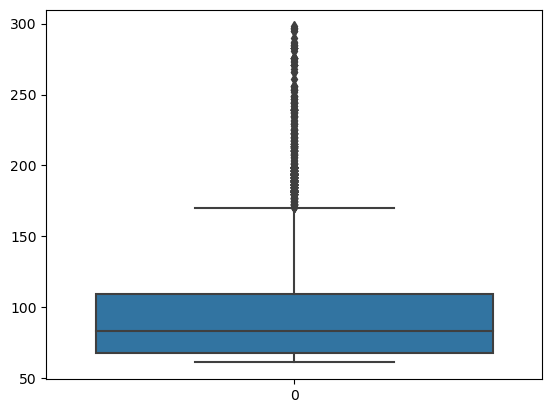

months_since_last_claim


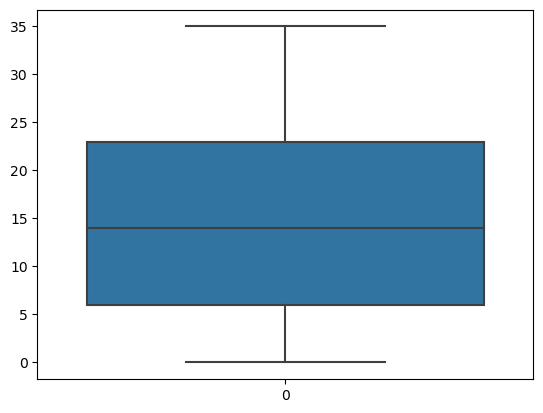

months_since_policy_inception


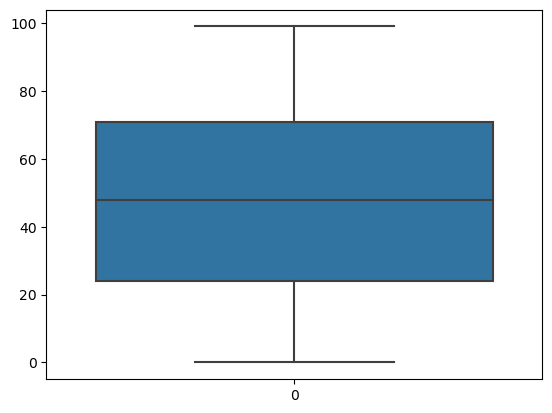

number_of_open_complaints


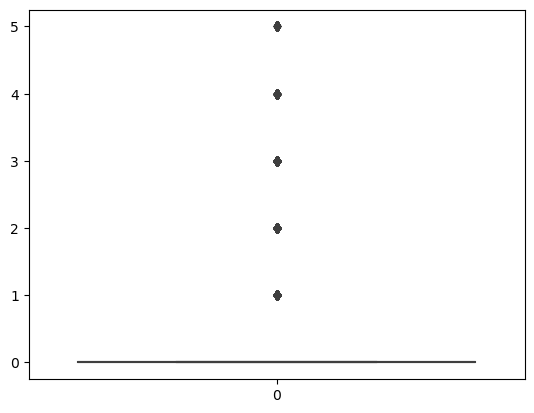

number_of_policies


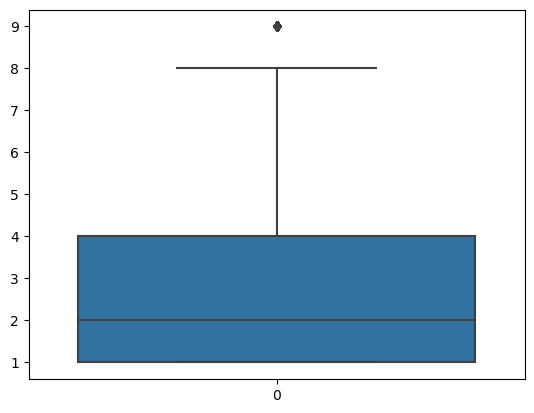

total_claim_amount


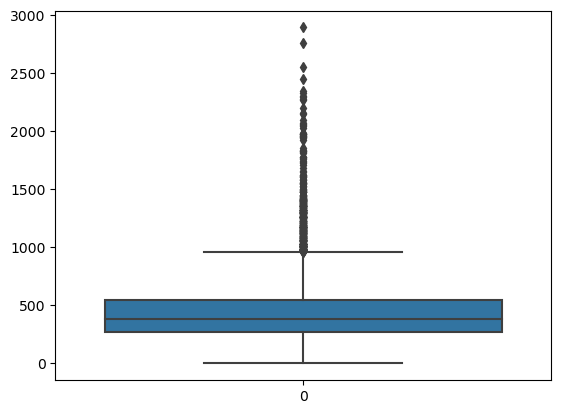

In [20]:
for col in numerical.columns:
    print(col)
    sns.boxplot(numerical[col])
    plt.show()

I will filter the data in important for analysis columns after finding Interquartile Range.

In [21]:
categorical = df.select_dtypes('object')
categorical.head()

customer       state response  coverage education employment_status gender  \
0  BU79786  Washington       No     Basic  Bachelor          Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor        Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor          Employed      F   
3  WW63253  California       No     Basic  Bachelor        Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor          Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

In [22]:
categorical.drop(columns=['customer'], inplace=True)
categorical

state response  coverage education employment_status gender  \
0     Washington       No     Basic  Bachelor          Employed      F   
1        Arizona       No  Extended  Bachelor        Unemployed      F   
2         Nevada       No   Premium  Bachelor          Employed      F   
3     California       No     Basic  Bachelor        Unemployed      M   
4     Washington       No     Basic  Bachelor          Employed      M   
...          ...      ...       ...       ...               ...    ...   
9129  California       No     Basic  Bachelor          Employed      M   
9130  California      Yes  Extended   College          Employed      F   
9131  California       No  Extended  Bachelor        Unemployed      M   
9132  California       No  Extended   College          Employed      M   
9133  California       No  Extended   College        Unemployed      M   

     location_code marital_status     policy_type        policy  \
0         Suburban        Married  Corporate Auto  Corporate L3   
1         Suburban         Single   Personal Auto   Personal L3   
2         Suburban        Married   Personal Auto   Personal L3   
3         Suburban        Married  Corporate Auto  Corporate L2   
4            Rural         Single   Personal Auto   Personal L1   
...            ...            ...             ...           ...   
9129         Urban        Married   Personal Auto   Personal L1   
9130      Suburban       Divorced  Corporate Auto  Corporate L3   
9131      Suburban         Single  Corporate Auto  Corporate L2   
9132      Suburban        Married   Personal Auto   Personal L2   
9133      Suburban         Single  Corporate Auto  Corporate L3   

     renew_offer_type sales_channel  vehicle_class vehicle_size  
0              Offer1         Agent   Two-Door Car      Medsize  
1              Offer3         Agent  Four-Door Car      Medsize  
2              Offer1         Agent   Two-Door Car      Medsize  
3              Offer1   Call Center            SUV      Medsize  
4              Offer1         Agent  Four-Door Car      Medsize  
...               ...           ...            ...          ...  
9129           Offer2           Web  Four-Door Car      Medsize  
9130           Offer1        Branch  Four-Door Car      Medsize  
9131           Offer1        Branch  Four-Door Car      Medsize  
9132           Offer3        Branch  Four-Door Car        Large  
9133           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 14 columns]

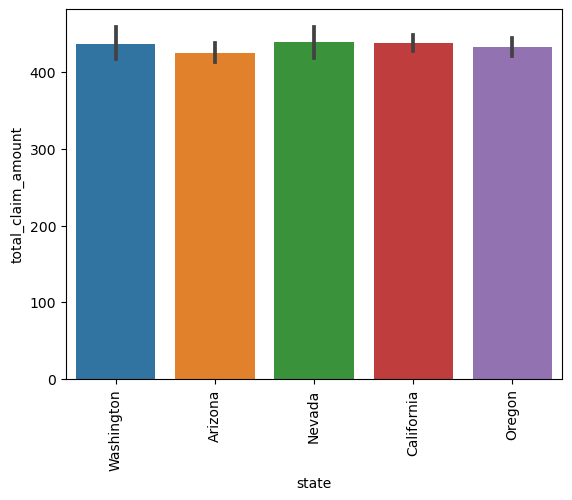

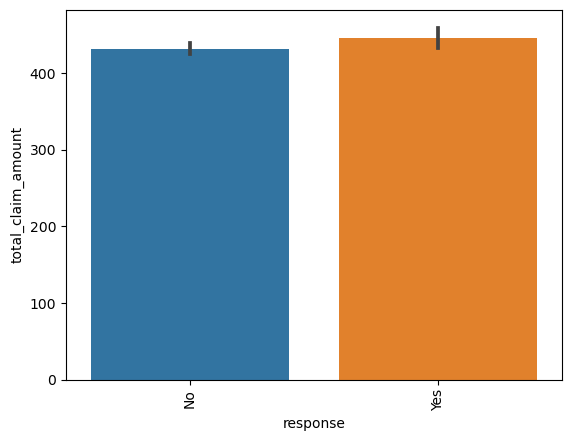

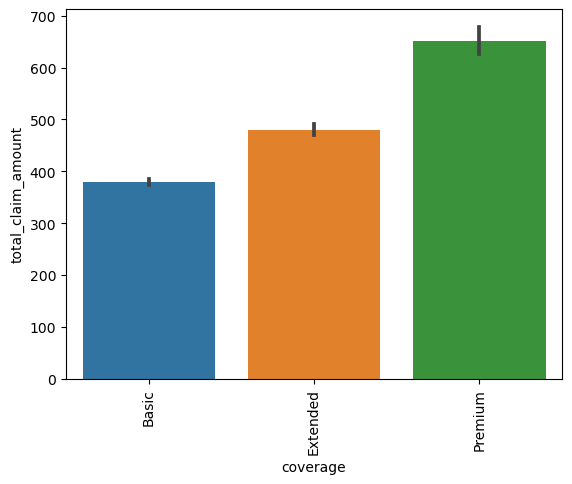

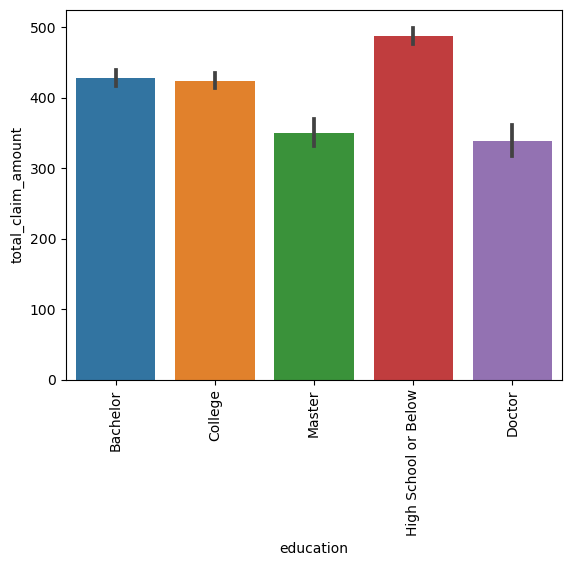

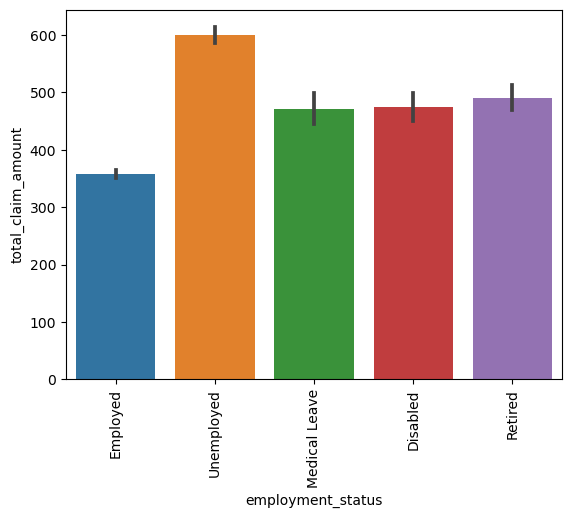

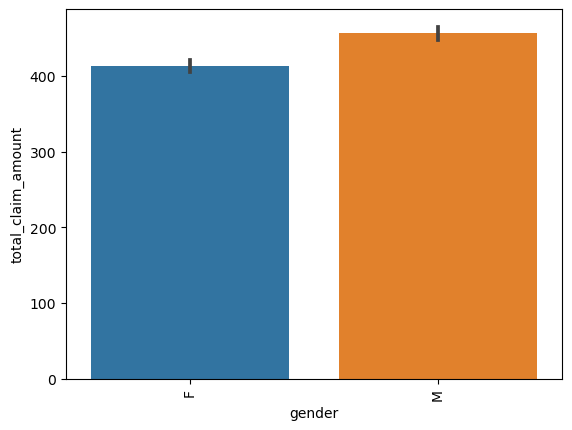

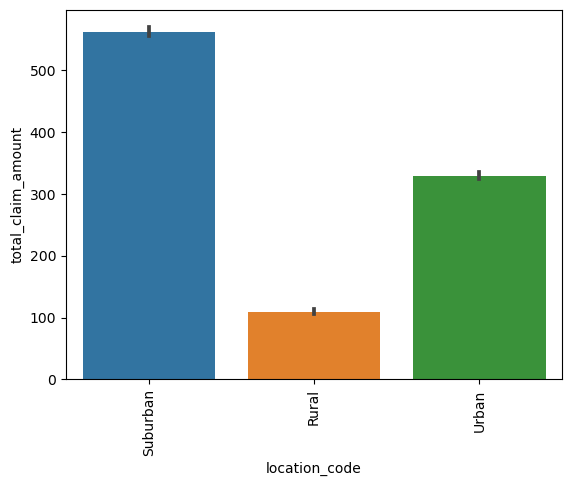

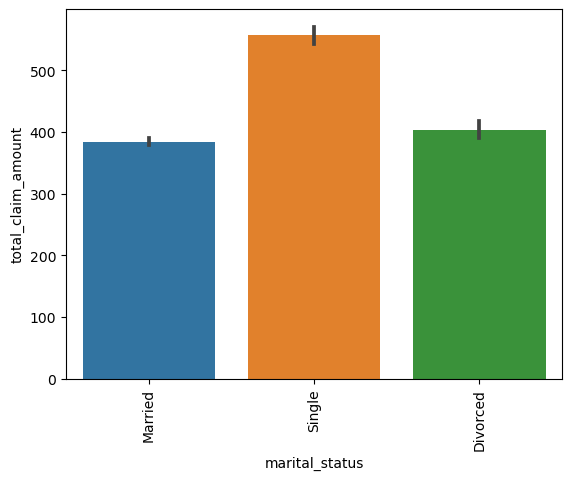

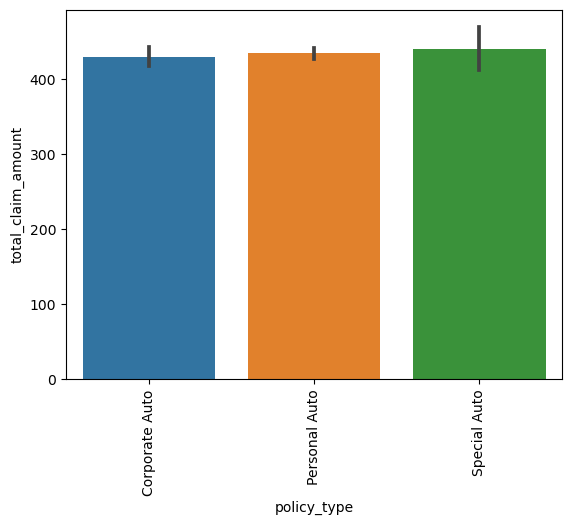

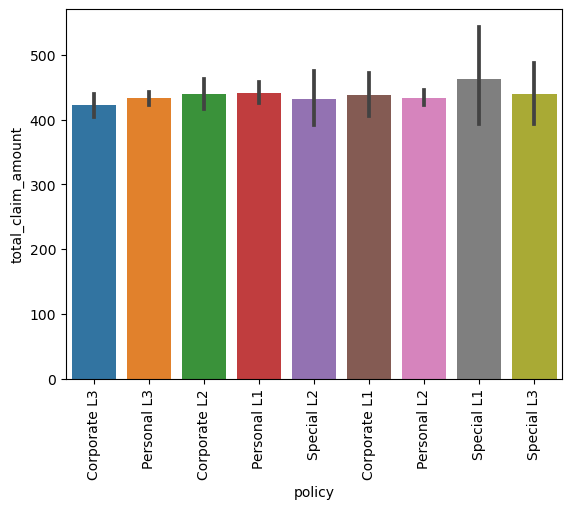

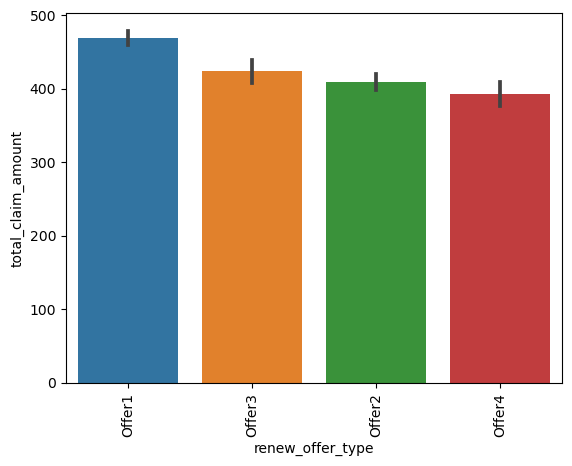

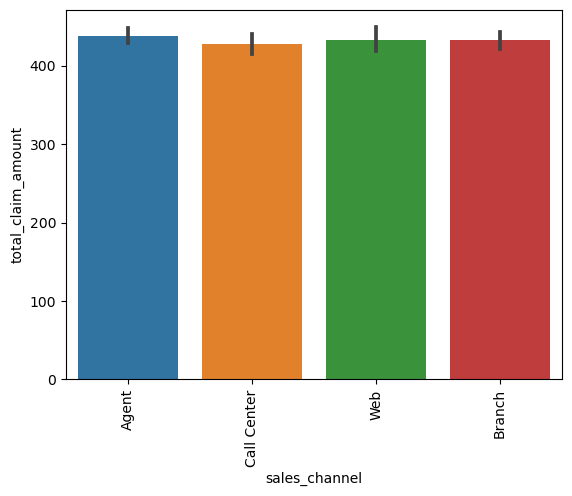

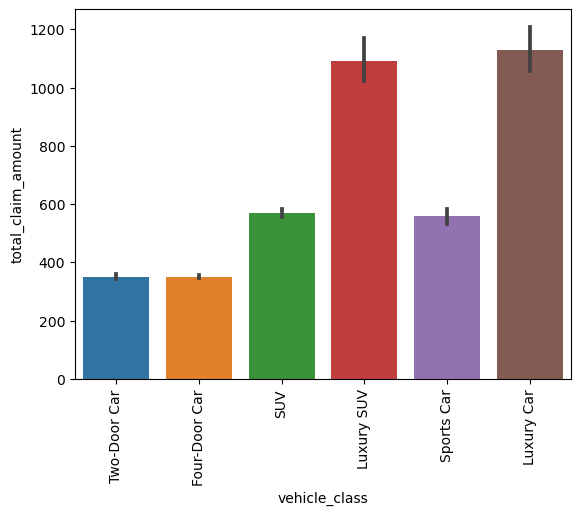

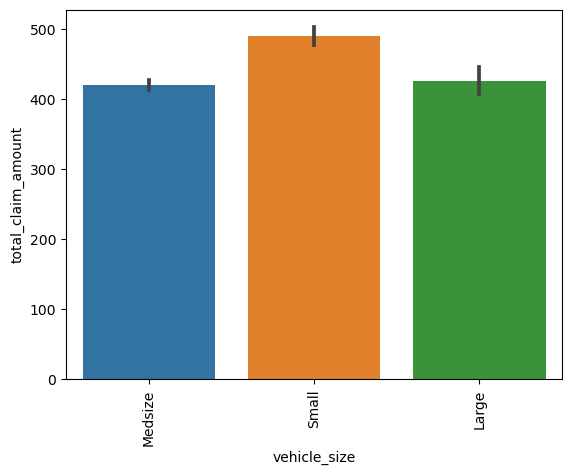

In [23]:
for col in categorical.columns:
    sns.barplot(x=categorical[col], y=df['total_claim_amount'])
    plt.xticks(rotation=90)
    plt.show()

Before plotting the data we deleted customer column because there were unique id values which didn't contain any relevant info for analysis.We can see that total_claim_amount almost the same for all states, so doesn't depend on state, as well doesn't depend on response, gender, policy_type(categories has almost the same claim, but special_auto has bigger variabilities), polica(special L1 has big variability, as well as l2, l3), sales channel. We can see that claim-amount bigger for premium coverage,suburban in location code, for single in marital-status, luxury_car in vehicle_class and small_size. 

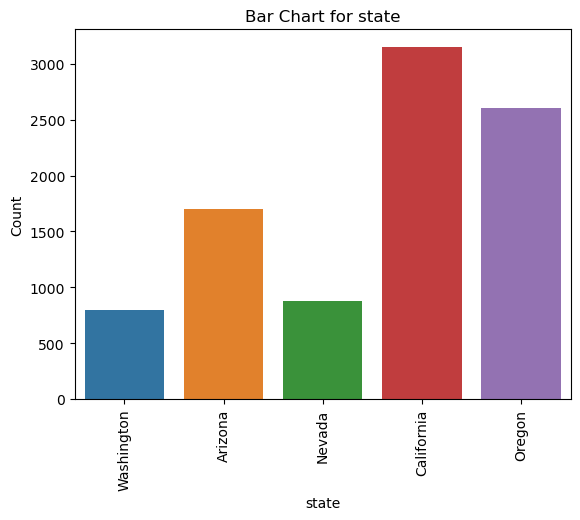

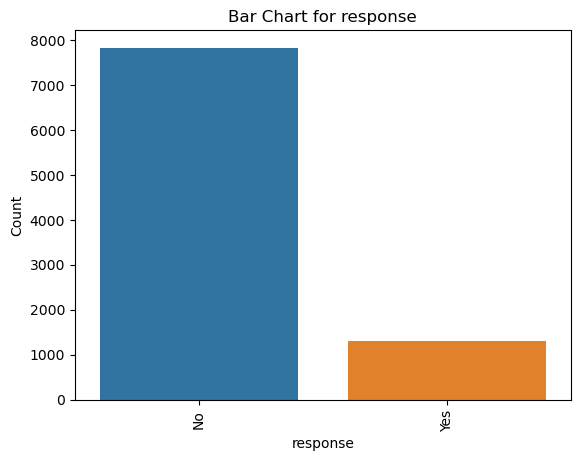

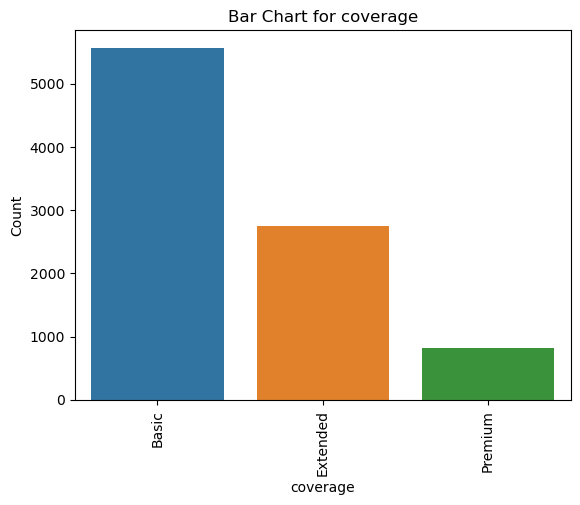

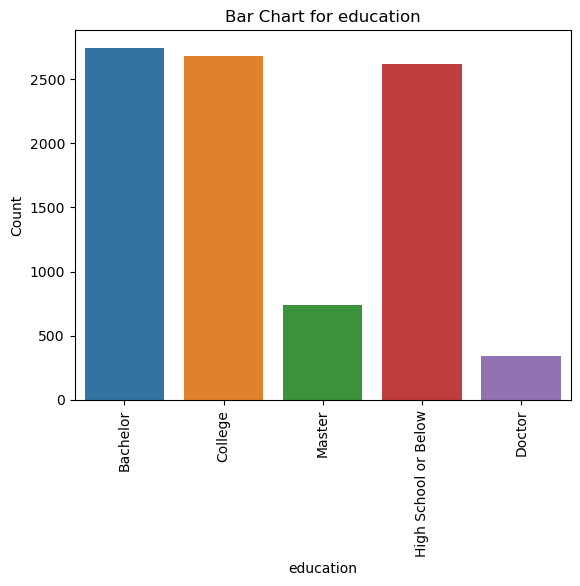

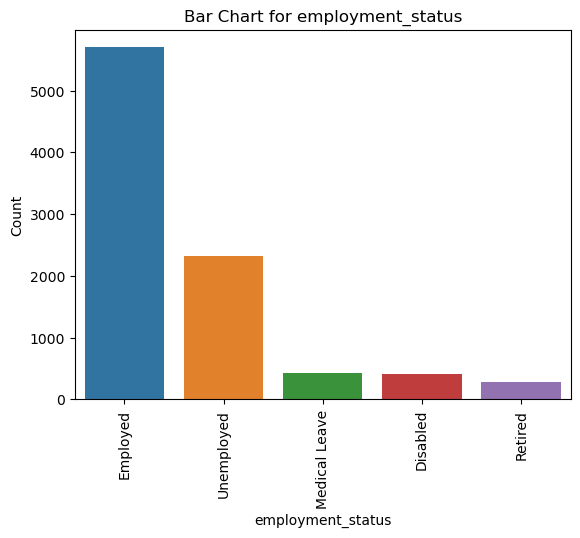

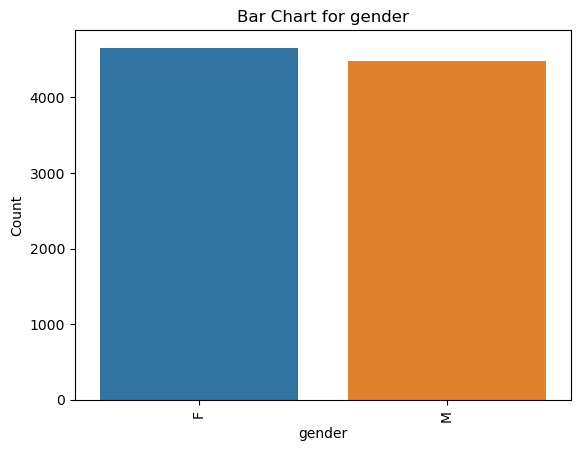

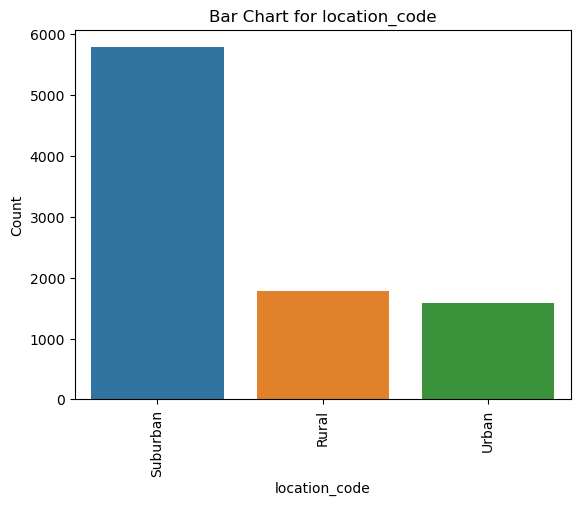

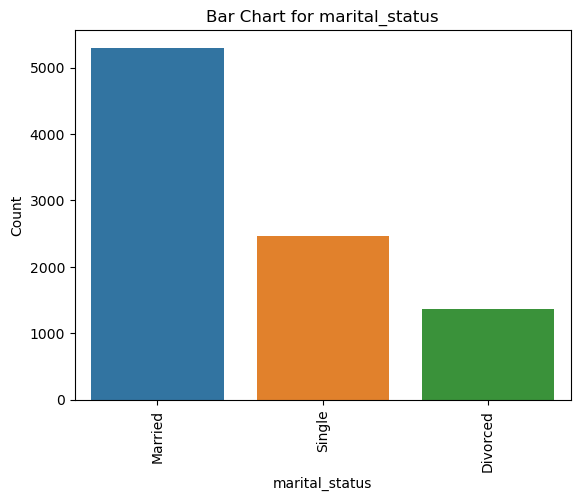

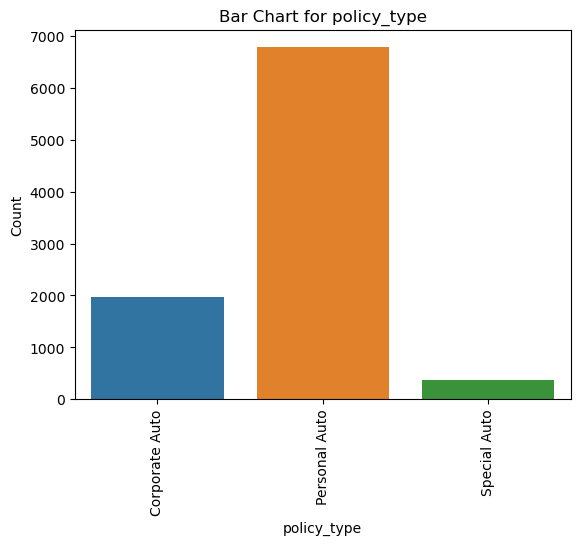

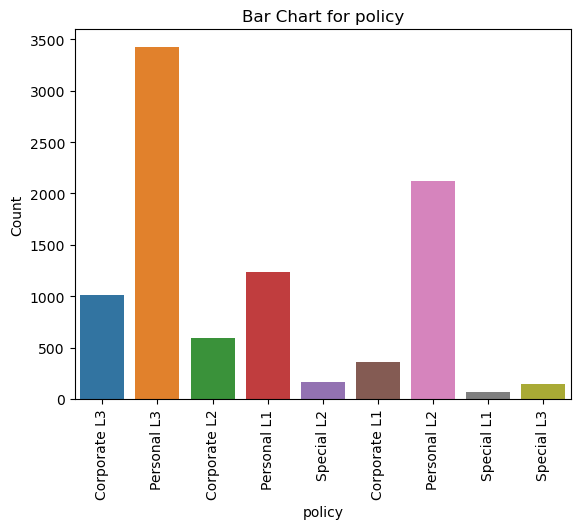

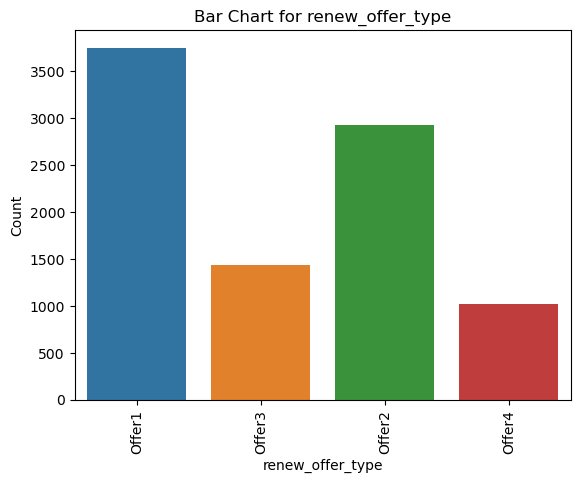

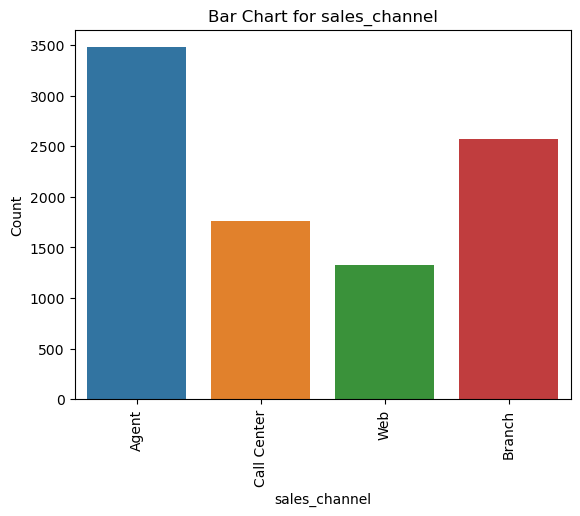

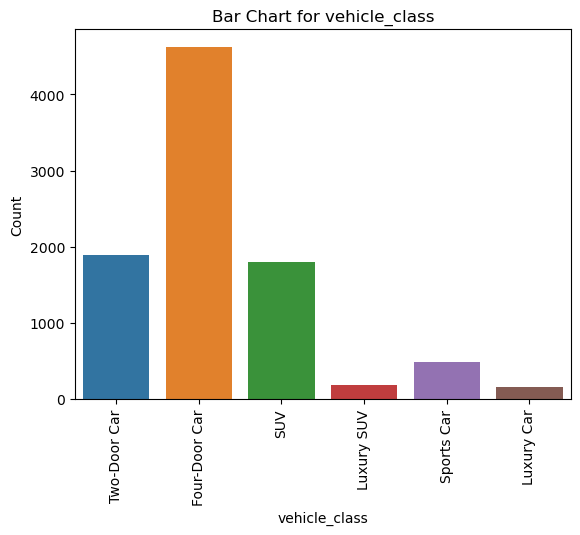

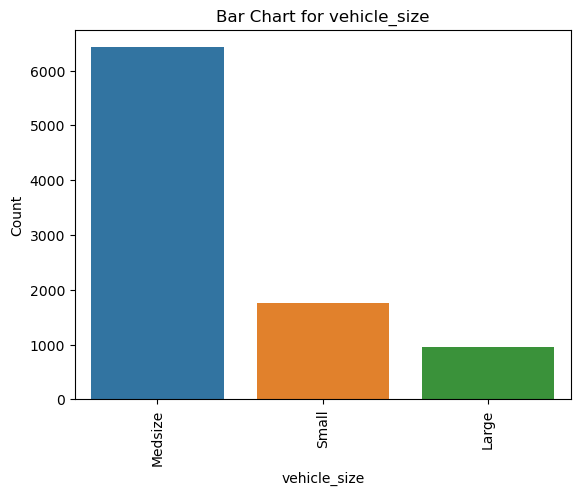

In [24]:
for col in categorical.columns:
    sns.countplot(x=col, data=categorical)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar Chart for {col}')
    plt.xticks(rotation=90)
    plt.show()

Countplot can help us to see actual count of all features from different categories and compare them. It helps us to understand how common each category is within that variable. We can use countplot and barplot together for better understanding relationships between variables and target.

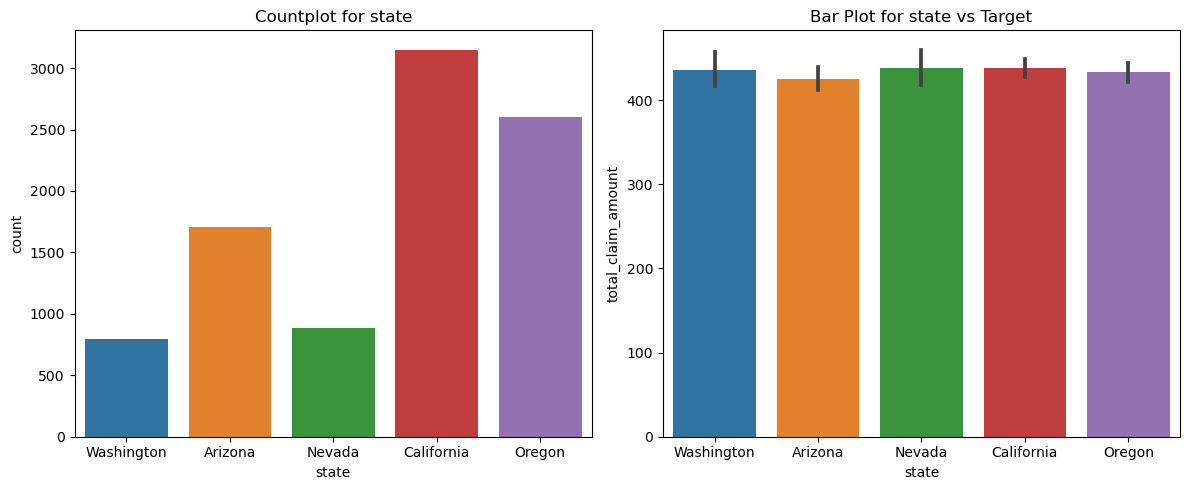

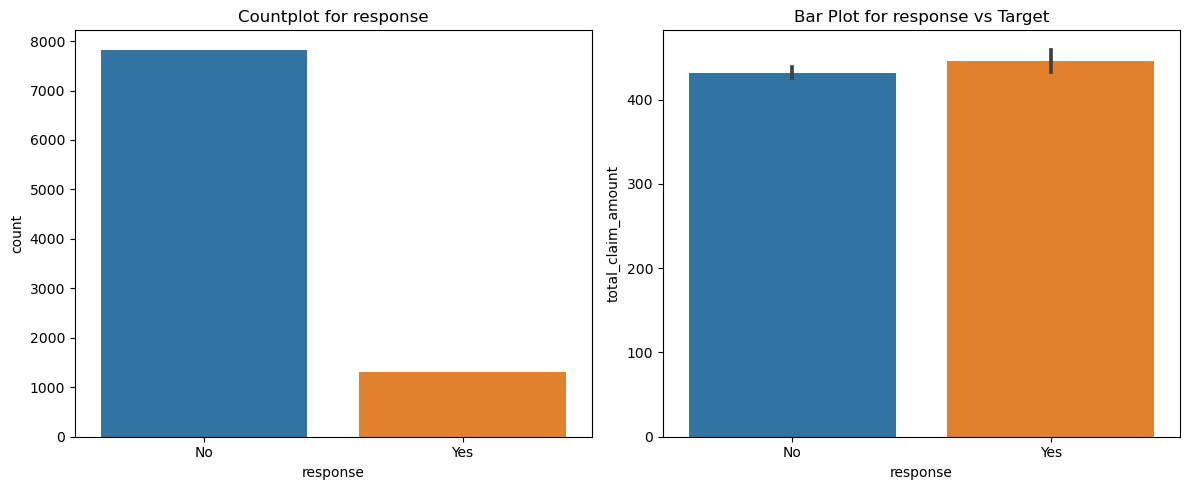

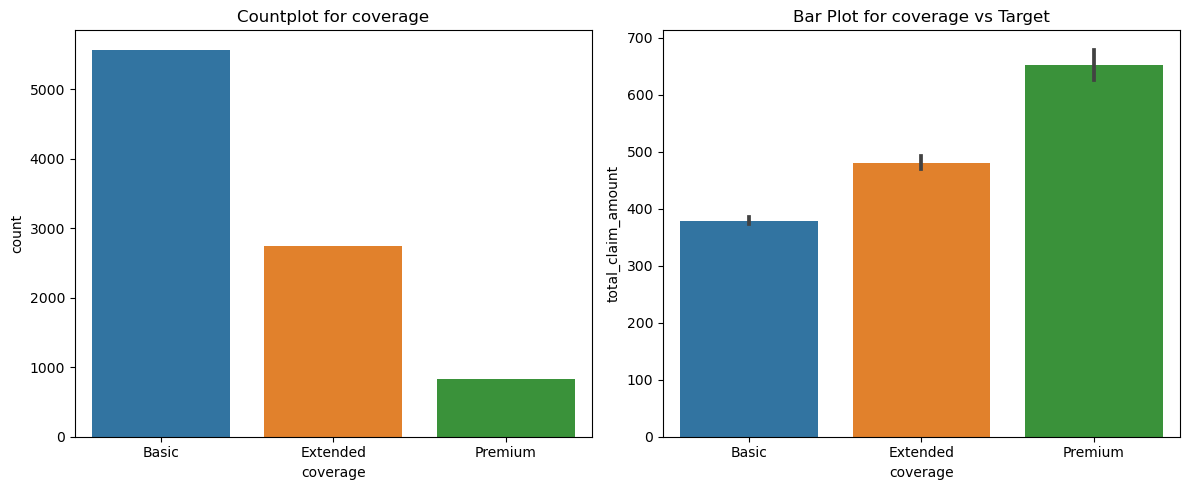

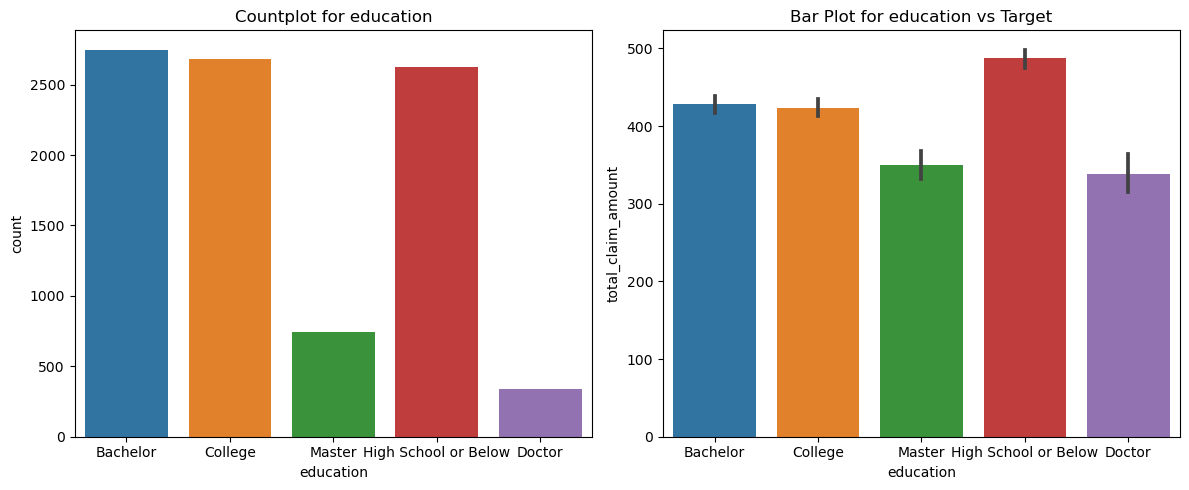

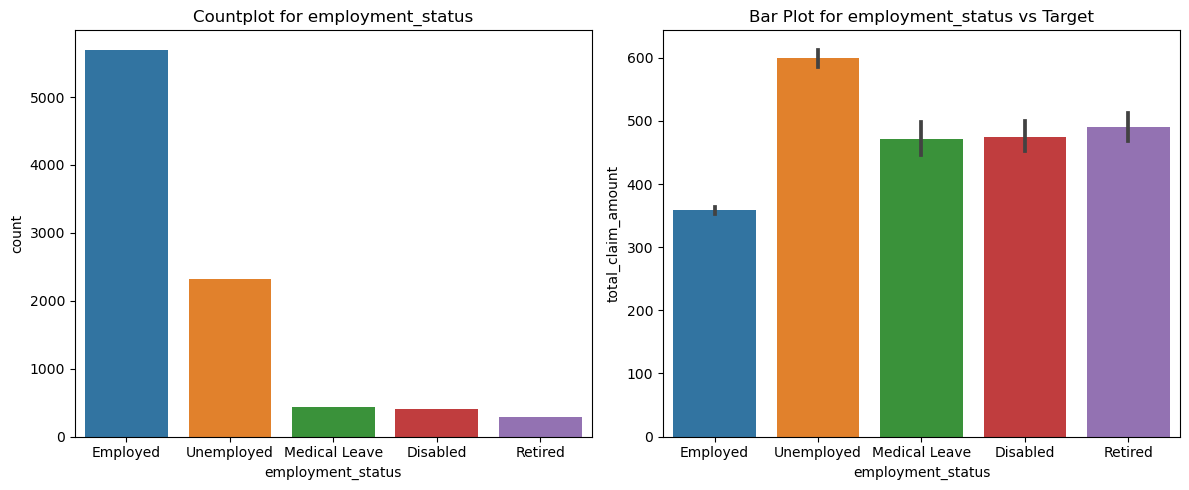

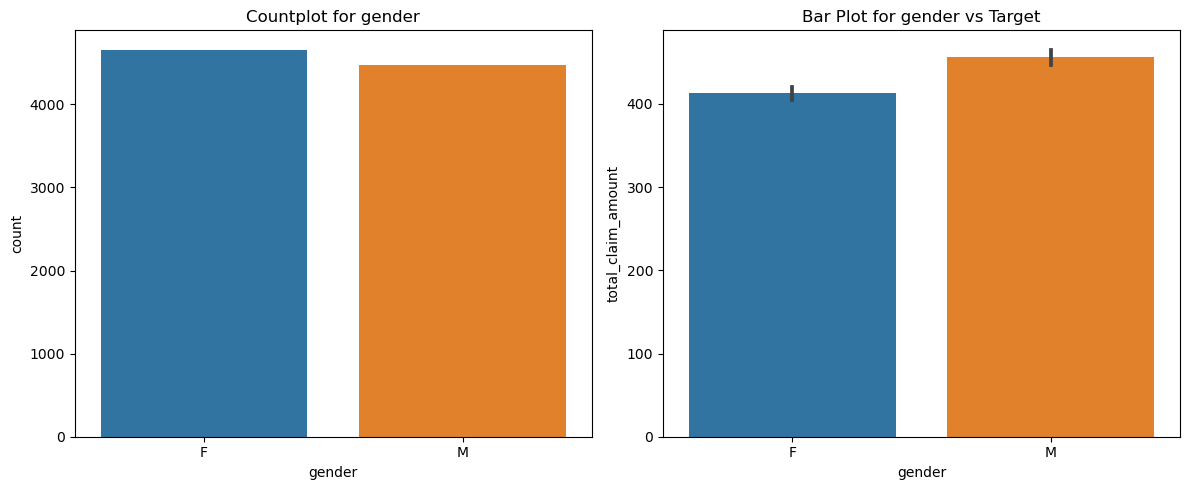

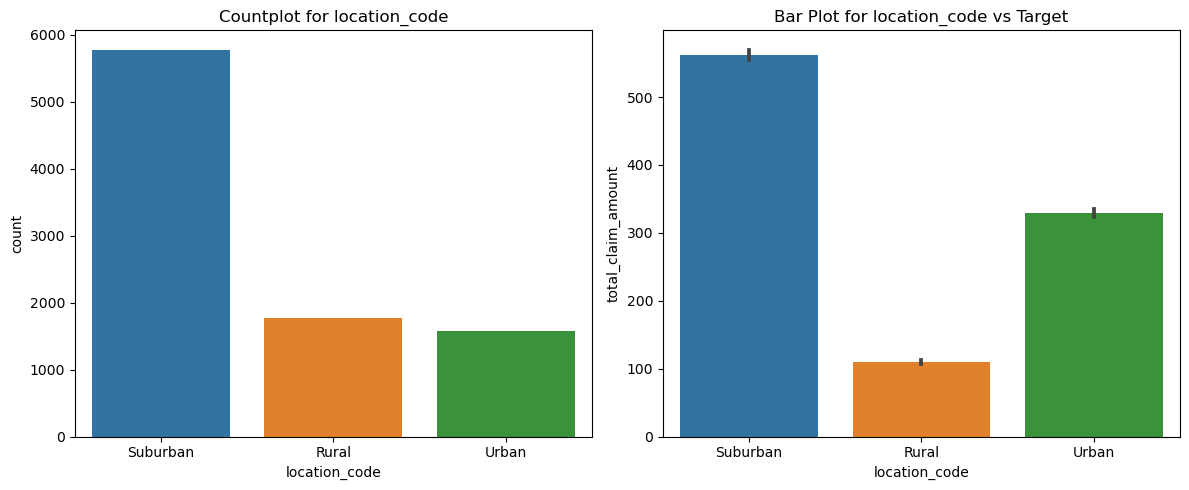

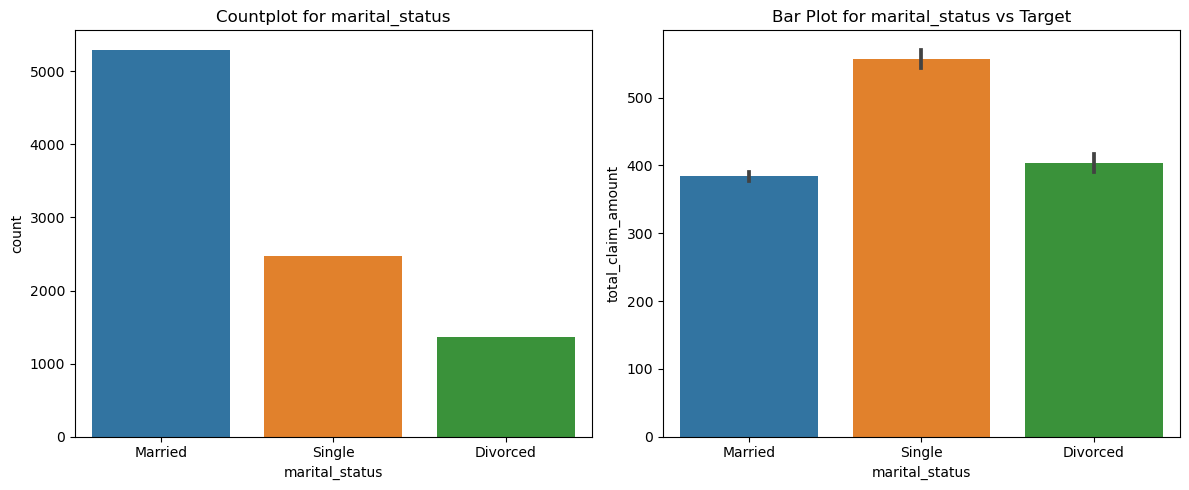

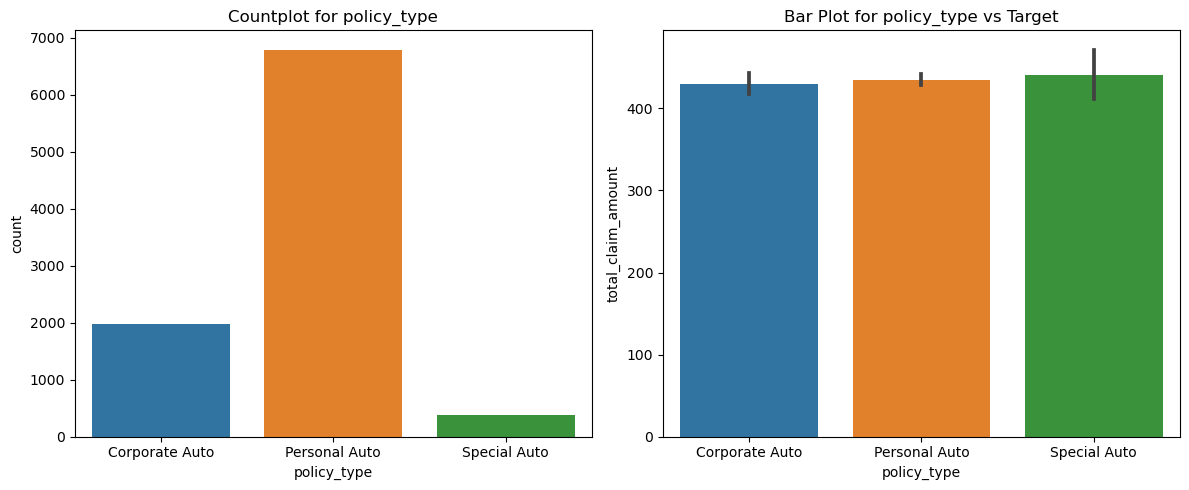

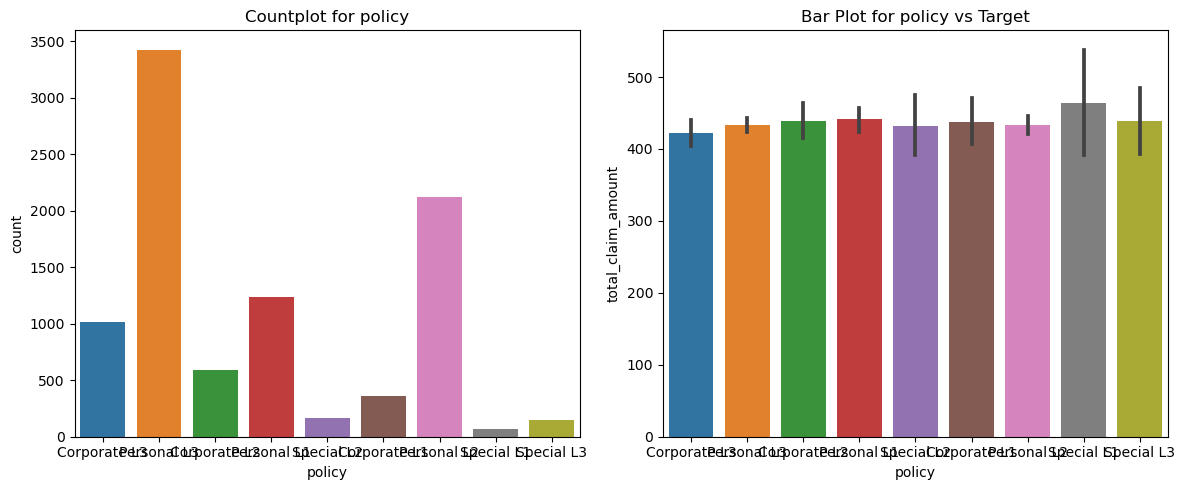

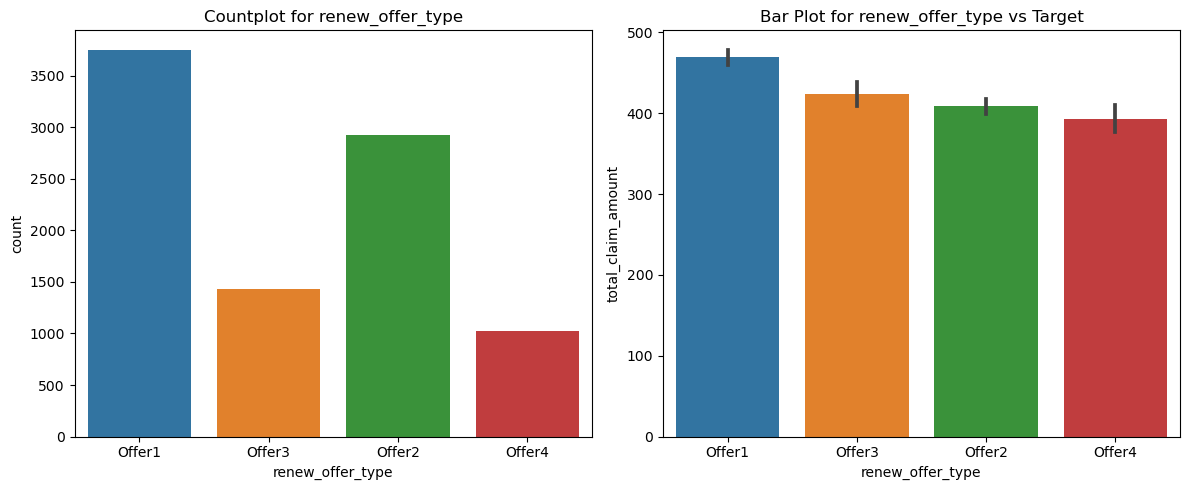

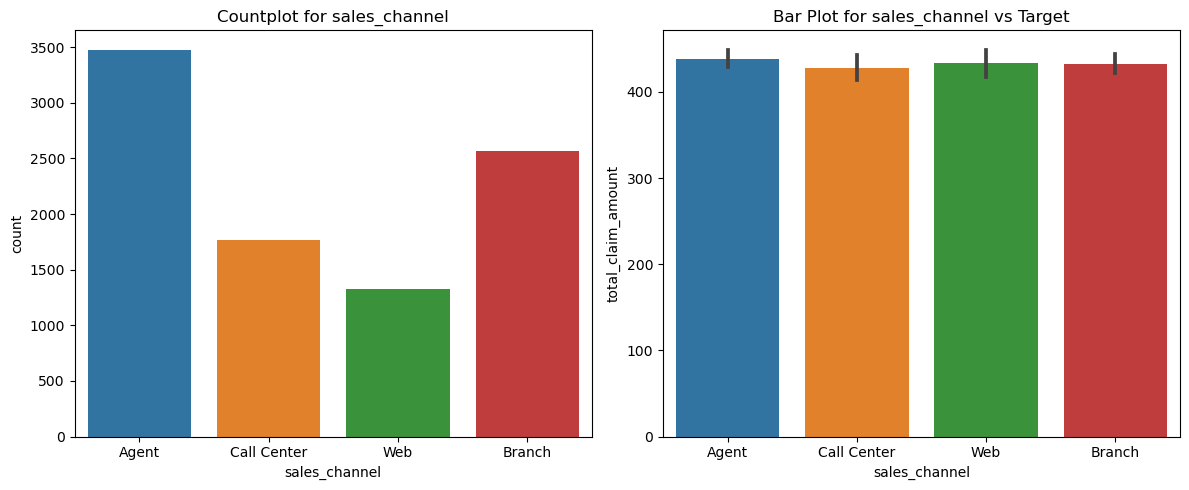

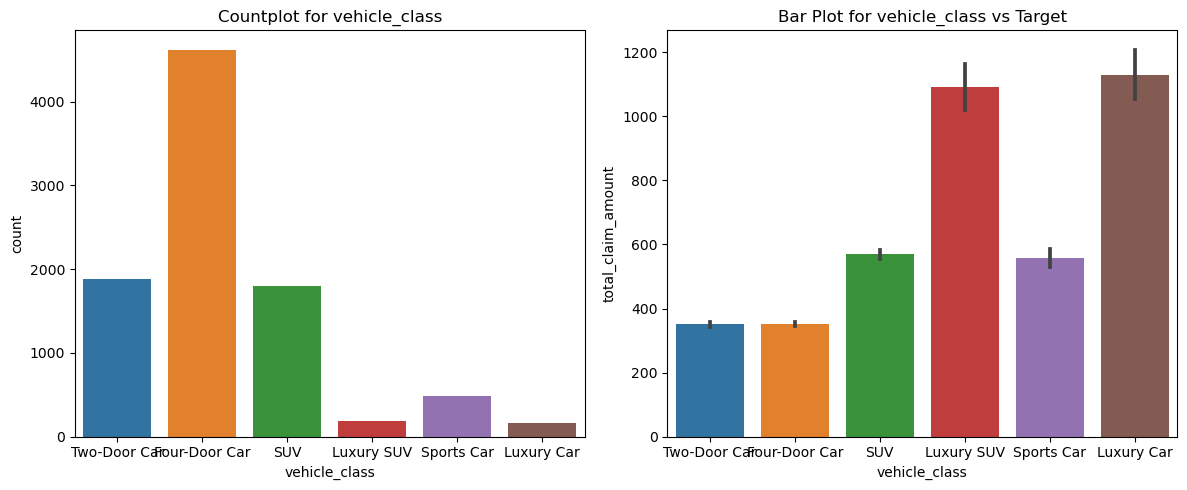

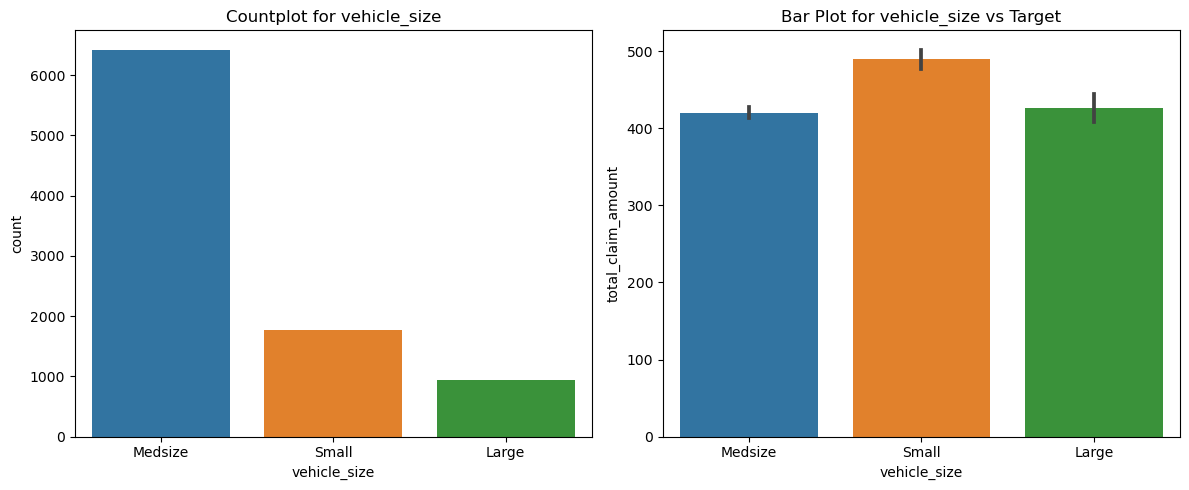

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical.columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=categorical)
    plt.title(f'Countplot for {col}')
    plt.subplot(1, 2, 2)
    sns.barplot(x=col, y='total_claim_amount', data=df)
    plt.title(f'Bar Plot for {col} vs Target')
    plt.tight_layout()
    plt.show()


In [26]:
for col in categorical.columns:
    print(categorical[col].value_counts())

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
response
No     7826
Yes    1308
Name: count, dtype: int64
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
employment_status
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64
gender
F    4658
M    4476
Name: count, dtype: int64
location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64
marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64
policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64
policy
Personal L3     3426
Personal L2     2122
P

We don't need to clean our categorical data here, because for every column we have small amount of features and they all standerdized.

In [27]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [28]:
drop_col = ['total_claim_amount','customer','effective_to_date' ]
X=df.drop(drop_col, axis=1)
X.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [29]:
X.select_dtypes('object')

state response  coverage education employment_status gender  \
0     Washington       No     Basic  Bachelor          Employed      F   
1        Arizona       No  Extended  Bachelor        Unemployed      F   
2         Nevada       No   Premium  Bachelor          Employed      F   
3     California       No     Basic  Bachelor        Unemployed      M   
4     Washington       No     Basic  Bachelor          Employed      M   
...          ...      ...       ...       ...               ...    ...   
9129  California       No     Basic  Bachelor          Employed      M   
9130  California      Yes  Extended   College          Employed      F   
9131  California       No  Extended  Bachelor        Unemployed      M   
9132  California       No  Extended   College          Employed      M   
9133  California       No  Extended   College        Unemployed      M   

     location_code marital_status     policy_type        policy  \
0         Suburban        Married  Corporate Auto  Corporate L3   
1         Suburban         Single   Personal Auto   Personal L3   
2         Suburban        Married   Personal Auto   Personal L3   
3         Suburban        Married  Corporate Auto  Corporate L2   
4            Rural         Single   Personal Auto   Personal L1   
...            ...            ...             ...           ...   
9129         Urban        Married   Personal Auto   Personal L1   
9130      Suburban       Divorced  Corporate Auto  Corporate L3   
9131      Suburban         Single  Corporate Auto  Corporate L2   
9132      Suburban        Married   Personal Auto   Personal L2   
9133      Suburban         Single  Corporate Auto  Corporate L3   

     renew_offer_type sales_channel  vehicle_class vehicle_size  
0              Offer1         Agent   Two-Door Car      Medsize  
1              Offer3         Agent  Four-Door Car      Medsize  
2              Offer1         Agent   Two-Door Car      Medsize  
3              Offer1   Call Center            SUV      Medsize  
4              Offer1         Agent  Four-Door Car      Medsize  
...               ...           ...            ...          ...  
9129           Offer2           Web  Four-Door Car      Medsize  
9130           Offer1        Branch  Four-Door Car      Medsize  
9131           Offer1        Branch  Four-Door Car      Medsize  
9132           Offer3        Branch  Four-Door Car        Large  
9133           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 14 columns]

In [30]:
y = df['total_claim_amount']
X = pd.get_dummies(X, columns=X.select_dtypes('object').columns, drop_first=True)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.7626526452366112
MAE: 94.53603676984038
RMSE: 137.3744343060165


In [32]:
data_importance = pd.Series([abs(i) for i in lr.coef_], index=X_train.columns).sort_values(ascending=False)
data_importance

policy_type_Special Auto           5.911109e+13
policy_Special L2                  3.961527e+13
policy_Special L3                  3.738868e+13
policy_Special L1                  2.496332e+13
policy_Personal L3                 1.506895e+13
policy_type_Personal Auto          1.354489e+13
policy_Personal L2                 1.314770e+13
policy_Personal L1                 1.070157e+13
location_code_Suburban             1.825404e+02
monthly_premium_auto               1.758753e+02
location_code_Urban                8.370501e+01
employment_status_Unemployed       2.846479e+01
marital_status_Single              2.764179e+01
renew_offer_type_Offer2            8.874715e+00
income                             8.871813e+00
response_Yes                       8.761290e+00
vehicle_class_Luxury Car           7.750571e+00
gender_M                           6.643536e+00
coverage_Extended                  5.890841e+00
vehicle_class_Sports Car           5.018436e+00
vehicle_size_Medsize               4.492

In [33]:
data_importance.index[:20]

Index(['policy_type_Special Auto', 'policy_Special L2', 'policy_Special L3',
       'policy_Special L1', 'policy_Personal L3', 'policy_type_Personal Auto',
       'policy_Personal L2', 'policy_Personal L1', 'location_code_Suburban',
       'monthly_premium_auto', 'location_code_Urban',
       'employment_status_Unemployed', 'marital_status_Single',
       'renew_offer_type_Offer2', 'income', 'response_Yes',
       'vehicle_class_Luxury Car', 'gender_M', 'coverage_Extended',
       'vehicle_class_Sports Car'],
      dtype='object')

In [34]:

X = X[data_importance.index[:25]]
y = df["total_claim_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.7626105853062113
MAE: 94.41346982330717
RMSE: 137.38660571445382


<Axes: >

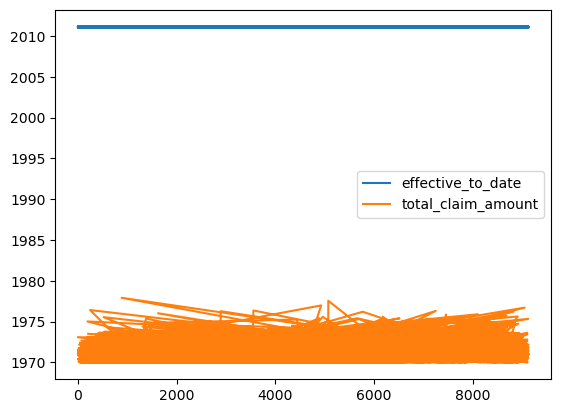

In [35]:
df[['effective_to_date','total_claim_amount']].sort_values('effective_to_date').plot()

In [41]:
df['effective_to_date'].value_counts()

effective_to_date
2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-02-01    154
2011-01-18    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-07    151
2011-01-25    151
2011-02-25    149
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-16    139
2011-02-13    139
2011-02-24    139
2011-02-09    137
2011-02-17    136
2011-01-22    136
2011-02-08

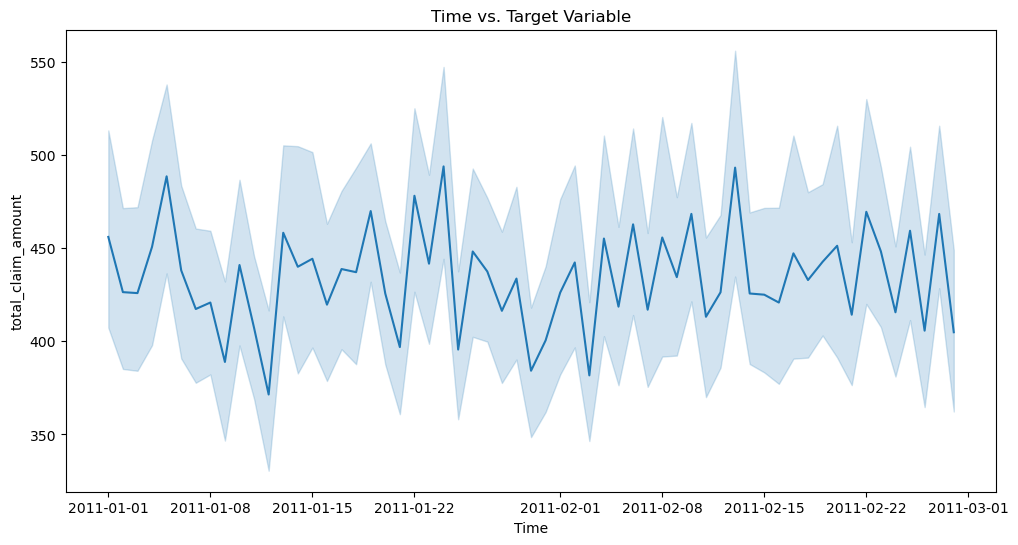

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=df)
plt.title('Time vs. Target Variable')
plt.xlabel('Time')
plt.ylabel('total_claim_amount')
plt.show()